<a href="https://colab.research.google.com/github/hollyxue05/AMS-332-Physiological-Systems-Modeling/blob/main/Simulating_Enyzme_Kinetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulation of Biochemical Kinetics

In this notebook we expand our computational toolbox to include *simulation* of a dynamical system, using an enzyme-catalyzed reaction following the Hill equation as an example.

You should implement your own Python code in the appropriate block and ensure you are able to answer all relevant questions.

Please note that some questions may require you to work "by hand", so have a notepad or notebook handy.

Again, we will need two important Python libraries:  `numpy` and `matplotlib`. These are initialized in the following code-snippet:




In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# The Hill Equation

We have discussed the use of the Hill equation a general
functional form that can be used to describe *cooperativity* in
the rate of an enzyme or in the activity of a transcription factor:
$$
\nu = \frac{V_{\rm max}[S]^h}{K_{1/2}^h + [S]^h}
$$

When $h=1$, the Hill equation becomes identical
to the Michaelis-Menten equation.

In an earlier exercise, you visually explored how the parameters of the Hill equation impact its shape by creating plots of the equation with varying parameters.

Here we will numerically integrate the Hill equation to derive a trajectory through time.

## Numerical integration of the Hill equation.
The dynamics of an enzyme-catalyzed reaction, $E + S \to E + P$, can be modeled with the Hill equation, using the differential equation:

$$\frac{d[S]}{dt} = -\nu $$

Such a system can be numerically integrated to give $[S](t)$ given a starting value of $[S]_0$ at $t=0$.   One approach to numerical integration is the Forward Euler algorithm, which makes use of the repeated application of an update rule:

$$[S](t+\Delta t) = [S](t) +  \left ( \frac{d[S](t)}{dt} \right )\Delta t$$

for many steps using a very small value of $\Delta t$.

Implement this approach to simulate an enzyme-catalyzed reaction over a total time of $10$ s from an initial value of $[S]_0=100$ mM; use a time step of $\Delta t = 0.01$ s and model parameters of $h=4$, $V_{max}=20$ mM/s and $K_{1/2}=50$ mM.
* Compute an array of time points evenly spaced by $\Delta t$, from $0$ to $10$.
* Iteratively compute the value of $[S]$ at every time point, and store these in an array of equal size as the time array.
* Plot the computed concentrations vs time to visualize the dynamics of this system.




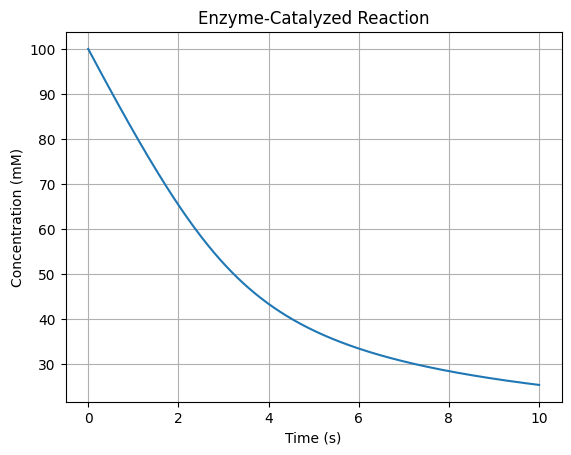

In [ ]:
# Enter code for simulation
import numpy as np
from matplotlib import pyplot as plt

h = 4
V_max = 20.0     # mM/s
K_half = 50.0    # mM
S0 = 100.0       # initial concentration in mM
dt = 0.01        # time step in seconds
total_time = 10.0

# time array from 0 to 10 seconds
time_points = np.arange(0, total_time + dt, dt)
n_steps = len(time_points)

S = np.zeros(n_steps)
S[0] = S0

# Iterative Forward Euler implementation
for i in range(n_steps - 1):
    # Calculate reaction rate using the Hill equation
    # nu = (Vmax * [S]^h) / (Khalf^h + [S]^h)
    numerator = V_max * (S[i]**h)
    denominator = (K_half**h) + (S[i]**h)
    nu = numerator / denominator

    # Update rule: [S](t + dt) = [S](t) - nu * dt
    S[i+1] = S[i] - nu * dt

# plotting the results
plt.plot(time_points, S, label='Substrate Concentration [S]')
plt.title('Enzyme-Catalyzed Reaction')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mM)')
plt.grid(True)
plt.show()


## Interpreting your simulation.

The plot you generated through numerical integration does not (or at least should not) match that of the Hill equation (plotted in an earlier assignment), even though the same parameters were used.  Why is this the case?

If you simulated the system for 20 seconds instead of 10, what do you expect you would observe?

If you began with $[S]_0=200$ mM instead of $100$, what do you expect you would observe?

How would you obtain the amount of *product* ($[P]$) over time, instead of the amount of substrate?



### Enter your answer here



1. The plot that was generated here is a graph of substrate concentration as a function of time. The Hill plots generated in the previous assignment were graphs of reaction rate as a function of the substrate concentration. In addition, the nature of numerical integration means that the present substrate concentration is always changing. There is no similar behavior for the Hill plots.

2. If the simulation ran for longer, I anticipate that the substrate concentration will eventually reach zero or perhaps another stable equilibrium. The enzyme will continue to convert substrate into product as long enough substrate is present. Therefore, the curve would continue its downward trend and flatten out horizontally until the substrate is depleted.

3. If the simulation began with a higher concentration of substrate, I anticipate that the initial slope will be significantly steeper as 200 Mm is a large increase from 50 Mm. Because the substrate concentration is so high, the reaction should be able to maintain a reaction rate around Vmax for longer.

4. The simple enzyme reaction chemical equation is $E+S →E+P$. This tells me that substrate is transformed into the product in a one to one ratio. Therefore, you can calculate the amount of product at time t by subtracting the $[S]_t$ from $[S]_0$. We were given $[S]_0$ and thanks to our numerically intrgrated plot, we can calculate $[S]_t$ at any $t$.